In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd;
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/DL/creditcard.csv')
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
raw_data = raw_data.drop("Time",axis=1)

In [5]:
raw_data.Class.unique()
features = raw_data.drop("Class",axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features,raw_data['Class'],random_state=4,test_size=0.3)

In [7]:
train_data = x_train.loc[y_train[y_train==1].index]

In [8]:
minmax = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = minmax.fit_transform(train_data)
x_test_scaled = minmax.transform(x_test)

In [9]:
class AutoEncoder(Model):
    def __init__(self,output_unit,ldim=8):
        super().__init__()
        self.encoder = Sequential([
#             Dense(64,activation='relu'),
#             Dropout(0.1),
#             Dense(32,activation='relu'),
#             Dropout(0.1),
            Dense(16,activation='relu'),
            Dropout(0.1),
            Dense(ldim,activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16,activation='relu'),
#             Dropout(0.1),
#             Dense(32,activation='relu'),
#             Dropout(0.1),
#             Dense(64,activation='relu'),
            Dropout(0.1),
            Dense(output_unit,activation='sigmoid')
        ])
    def call(self,inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
model = AutoEncoder(output_unit =  x_train_scaled.shape[1])
model.compile(optimizer='adam',loss='msle',metrics=['mse'])
h = model.fit(
    x_train_scaled,
    x_train_scaled,
    validation_data=(x_test_scaled,x_test_scaled),epochs=20,batch_size=512
)
print(x_train_scaled.shape[1])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0267 - mse: 0.0580 - val_loss: 0.0359 - val_mse: 0.0816
Epoch 2/20
1/1 [==============================] - 0s 311ms/step - loss: 0.0265 - mse: 0.0576 - val_loss: 0.0356 - val_mse: 0.0810
Epoch 3/20
1/1 [==============================] - 0s 338ms/step - loss: 0.0263 - mse: 0.0570 - val_loss: 0.0354 - val_mse: 0.0805
Epoch 4/20
1/1 [==============================] - 0s 323ms/step - loss: 0.0260 - mse: 0.0565 - val_loss: 0.0352 - val_mse: 0.0801
Epoch 5/20
1/1 [==============================] - 0s 335ms/step - loss: 0.0258 - mse: 0.0560 - val_loss: 0.0350 - val_mse: 0.0798
Epoch 6/20
1/1 [==============================] - 0s 338ms/step - loss: 0.0256 - mse: 0.0556 - val_loss: 0.0349 - val_mse: 0.0794
Epoch 7/20
1/1 [==============================] - 0s 342ms/step - loss: 0.0254 - mse: 0.0552 - val_loss: 0.0347 - val_mse: 0.0791
Epoch 8/20
1/1 [==============================] - 0s 342ms/step - loss: 0.0252 - mse: 0.0548 

In [11]:
import matplotlib.pyplot as plt

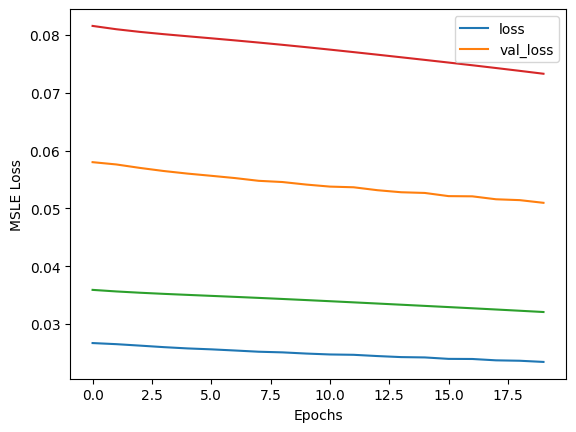

In [12]:
plt.plot(h.history['loss'])
plt.plot(h.history['mse'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['val_mse'])
plt.legend(['loss','val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.show()

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [14]:
def find_threshold(model,x_train_scaled):
    recons = model.predict(x_train_scaled)
    recons_error = tf.keras.metrics.msle(recons,x_train_scaled)
    threshold = np.mean(recons_error.numpy()) + np.std(recons_error.numpy())
    return threshold

In [15]:
def get_pred(model,x_test_scaled,threshold):
    pred = model.predict(x_test_scaled)
    error = tf.keras.metrics.msle(pred,x_test_scaled)
    AnomalyMask = pd.Series(error)>threshold
    return AnomalyMask.map(lambda x:0.0 if x==True else 1.0)

In [16]:
threshold = find_threshold(model,x_train_scaled)
print(threshold)

11/11 [==============================] - 0s 2ms/step
0.030761882212638605


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
pred = get_pred(model,x_test_scaled,threshold)

2671/2671 [==============================] - 4s 2ms/step


In [19]:
accuracy_score(pred,y_test)

0.6459276944863828